# Exercice 1 - Itérations asynchrones pour le labyrinthe

Cet exercice reprend le problème du labyrinthe. On copie-collera tout le code nécessaire, ou alternativement, on continuera sur le notebook précédent. On travaillera avec un labyrinthe tiré une fois pour toutes.

**Question 1**: Reprendre l'itération état-valeur synchrone pour le contrôle et déterminer une politique optimale (avec un grand nombre d'itérations). Déterminer également le nombre de mises à jour au bout duquel cette politique optimale est obtenue pour la première fois (une itération de l'opérateur $B_*$ correspond à $\mathcal{S}$ mises à jour).

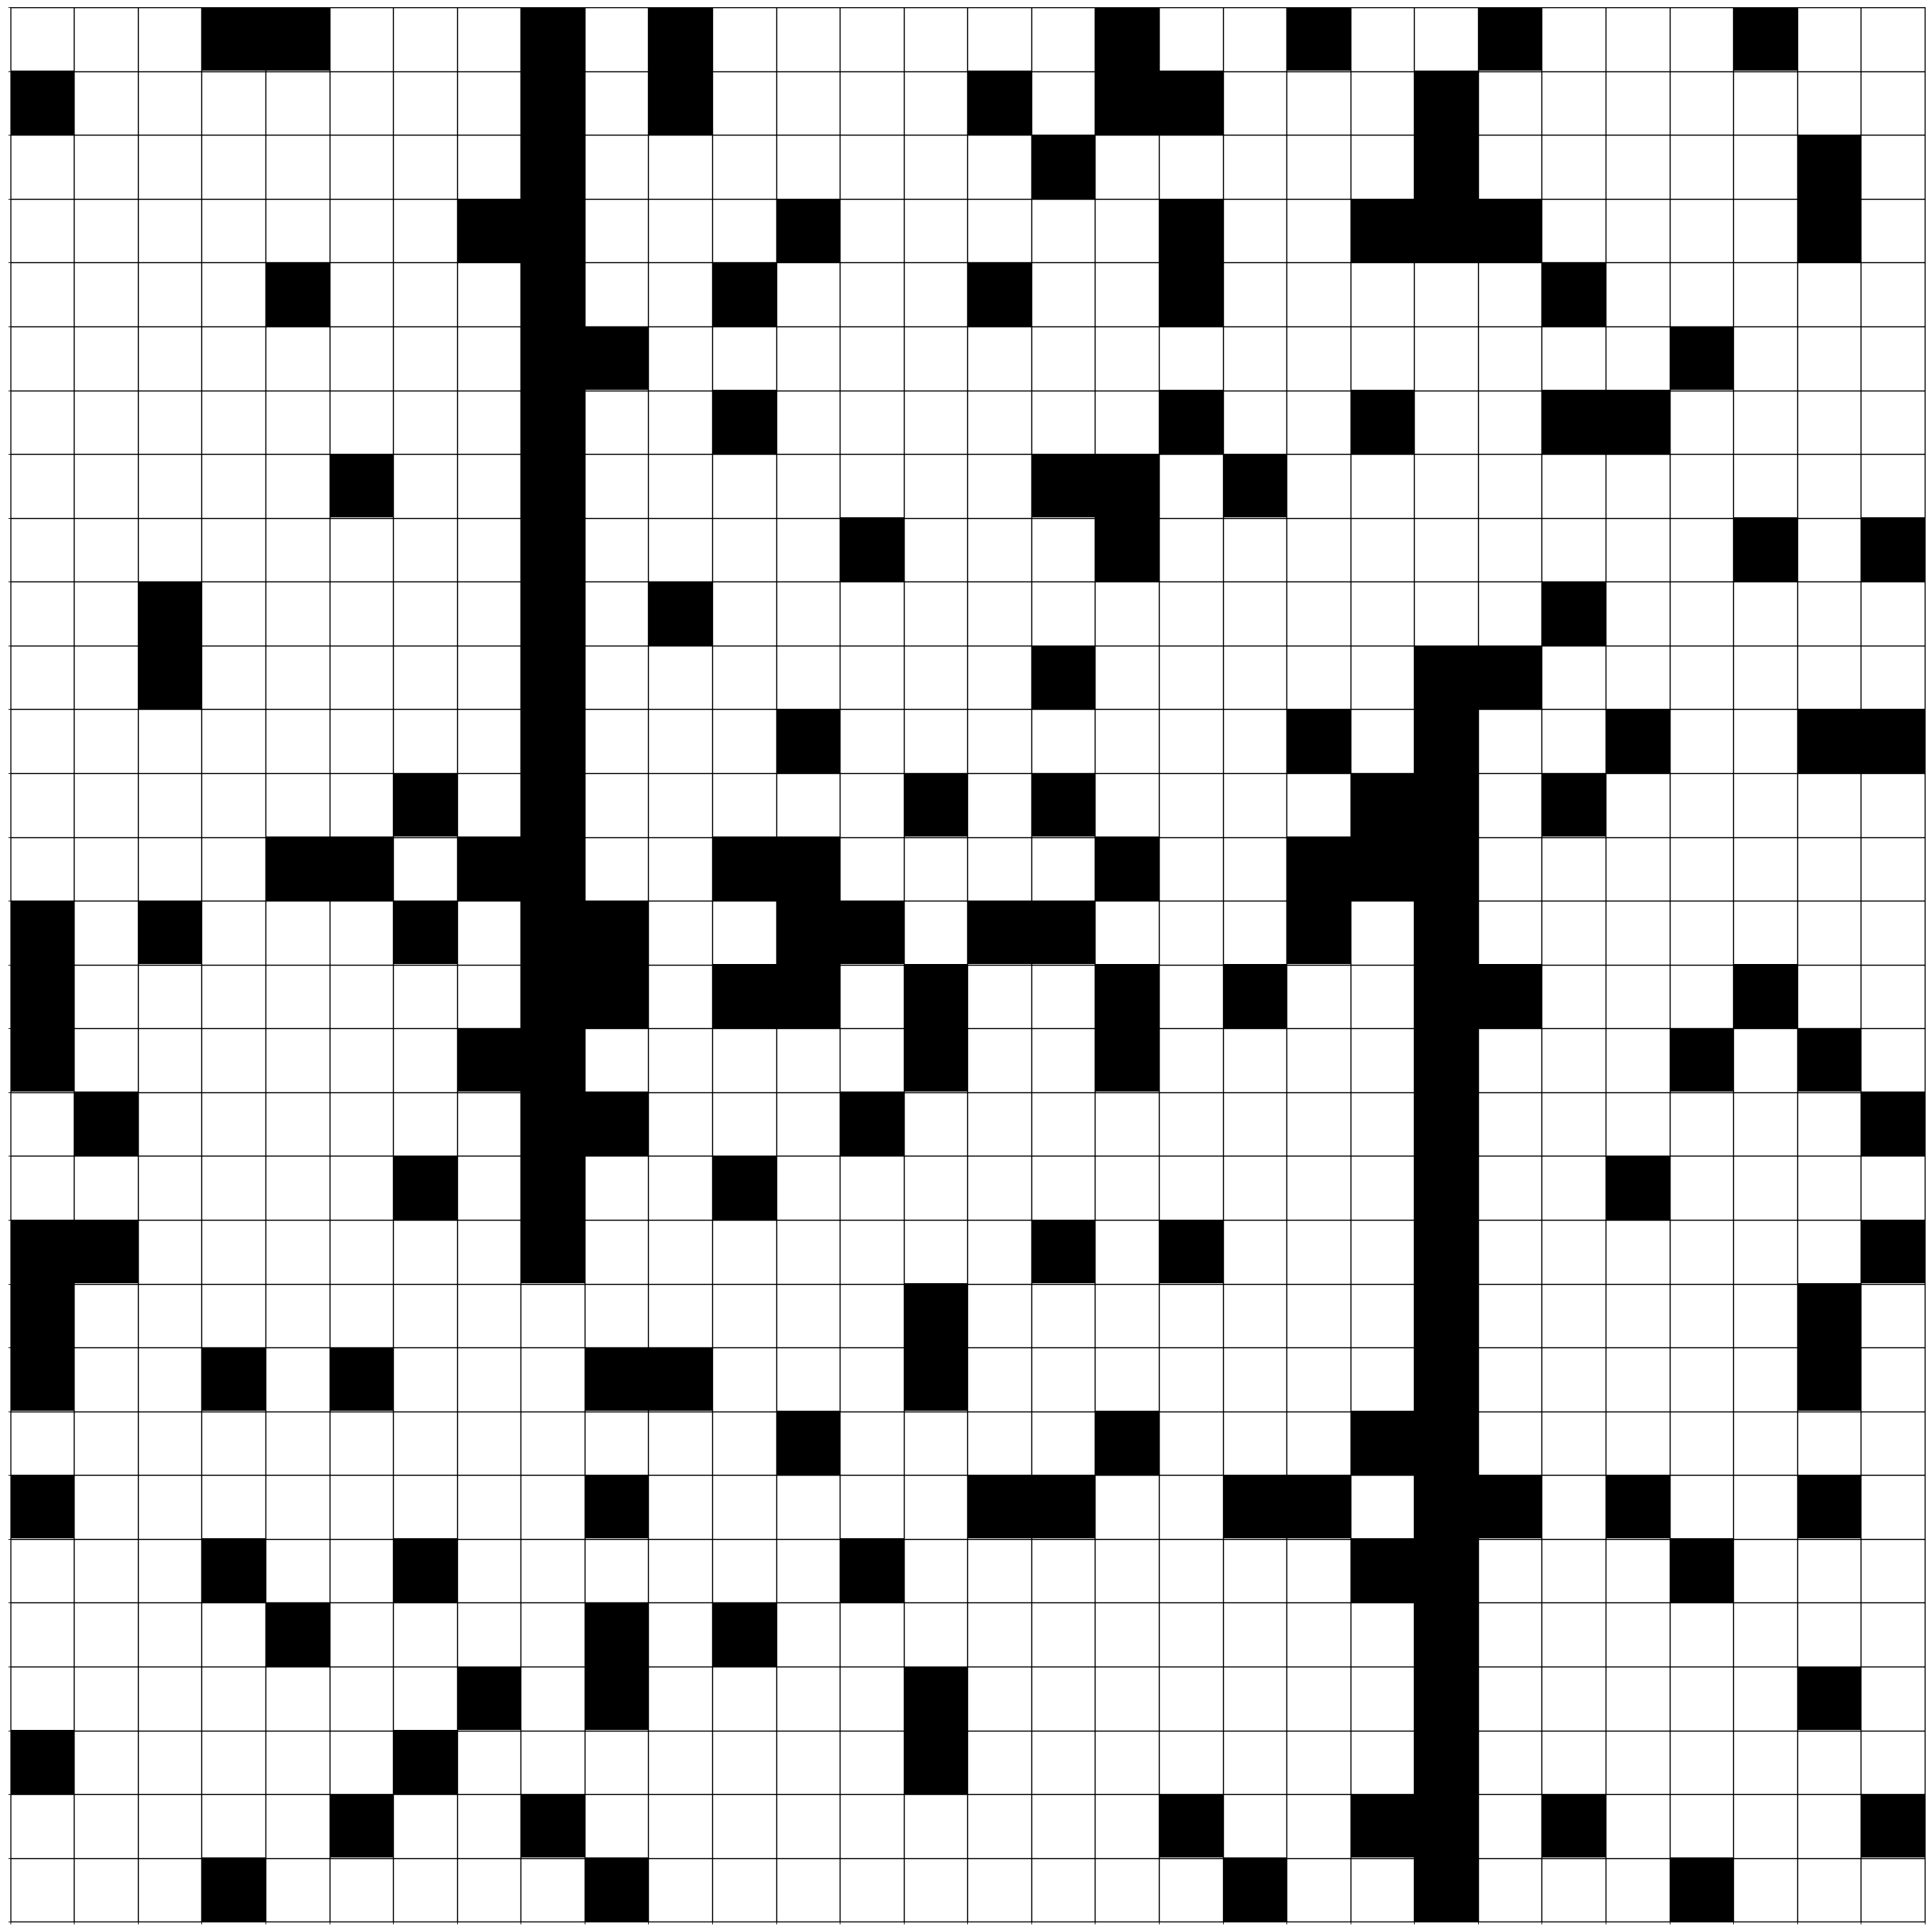

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap
np.set_printoptions(precision=3)
%matplotlib inline

def plot(policy=None, path=False):
    grid_size = maze.shape
    fig, ax = plt.subplots(figsize=(grid_size[1]+1, grid_size[0]+1))
    im = ax.imshow(maze, cmap='Greys', interpolation='nearest', extent=[0, grid_size[1], 0, grid_size[0]], alpha=1)
    ax.set_xticks(np.arange(0, grid_size[1]+1, 1), minor=True)
    ax.set_yticks(np.arange(0, grid_size[0]+1, 1), minor=True)
    ax.grid(which="minor", color='black', linestyle='-', linewidth=1)
    ax.set_xticks([])
    ax.set_yticks([])
    if policy is not None:
        # Plot arrows
        for i in range(grid_size[0]):
            for j in range(grid_size[1]):
                action = policy[i, j]
                ax.text(j + 0.5, grid_size[0] - i - 0.5, action_arrows[action],
                        ha='center', va='center', fontsize=12, fontweight='bold')
        if path is True:
            cmap = pl.cm.Reds
            my_cmap = cmap(np.arange(cmap.N))
            my_cmap[:,-1] = np.linspace(0, 1, cmap.N)
            my_cmap = ListedColormap(my_cmap)

            im = ax.imshow(path_array(policy), cmap=my_cmap, interpolation='nearest', extent=[0, grid_size[1], 0, grid_size[0]], alpha=.5)
    plt.show()
    
width = 30
height = 30
maze_size = (height, width) # nb lines & nb rows
start_cell = (0,0)
target_cell = (height-1, width-1)

maze = np.random.binomial(1, p=.15, size=maze_size)
maze[:round(2*width/3),round(height/4)] = 1
maze[round(width/3):,round(3*height/4)] = 1
chl = round(2*height/5)
chu = round(3*height/5)
cwl = round(2*width/5)
cwu = round(3*width/5)
maze[chl:chu,cwl:cwu] = np.random.binomial(1, p=.5, size=(chu-chl, cwu-cwl))
maze[start_cell] = 0
maze[target_cell] = 0
plot()

actions = [0,1,2,3]
action_coordinates = {0: np.array([1,0]),# down
                      1: np.array([0,1]), # right
                      2: np.array([-1,0]), # up
                      3: np.array([0,-1])} # left
action_arrows = ['↓', '→', '↑', '←']
gamma = .9

def transition(s,a):
    s_ = tuple(s + action_coordinates[a])

    if maze[s] == 1:
        return 0,s
    elif s_ == target_cell:
        return 1,s_

    elif 0 <= s_[0] < maze_size[0] and 0 <= s_[1] < maze_size[1] and maze[s_] != 1:
        return 0,s_
    elif s == target_cell:
        return 0,s
    else:
        return 0,s
    
def B_pi(v, pi): 
    v_ = np.empty(maze_size)
    for line in range(maze_size[0]):
        for row in range(maze_size[1]):
            s = (line,row)
            r, s_ = transition(s, pi(s))
            v_[line,row] = r + gamma*v[s_]
    return v_

def B_star(v): 
    v_ = np.empty(maze_size)
    for line in range(maze_size[0]):
        for row in range(maze_size[1]):
            s = (line,row)
            values = []
            for a in actions:
                r, s_ = transition(s, a)
                values.append(r + gamma*v[s_])
            v_[line,row] = max(values)
    return v_

def greedy_policy(v): 
    pi = np.empty(maze_size, dtype=int)
    for line in range(maze_size[0]):
        for row in range(maze_size[0]):
            s =  (line,row)
            values = []
            for a in actions:
                r, s_ = transition(s, a)
                values.append(r + gamma*v[s_])
            pi[line,row] = np.argmax(values)
    return pi

def path_array(policy):
    path = np.zeros_like(maze)
    s = start_cell
    while True:
        path[s]=1
        a = policy[s]
        _, s_ = transition(s, a)
        if path[s_] == 1 or s_ == target_cell:
            break
        s = s_
    return path

Iteration 0
Gap 1.0
Policy change at  20
Path change at  20
Iteration 20
Gap 0.13508517176729962
Policy change at  40
Iteration 40
Gap 0.01642320326826119
Policy change at  60
Iteration 60
Gap 0.0019966781110163367
Policy change at  80
Iteration 80
Gap 0.00024274944503188678
Policy change at  100
Path change at  100
Iteration 100
Gap 2.9512665431274954e-05
Iteration 120
Gap 3.5880511317643027e-06
Iteration 140
Gap 4.3622325351933e-07
Iteration 160
Gap 5.3034564739817824e-08
Iteration 180
Gap 6.4477654326822176e-09
Iteration 200
Gap 7.838982796215532e-10
Iteration 220
Gap 9.530420896908254e-11
Iteration 240
Gap 1.1586842596500446e-11
Iteration 260
Gap 1.4089840405517862e-12
Iteration 280
Gap 1.7186252421197423e-13
Iteration 300
Gap 2.1760371282653068e-14
Iteration 320
Gap 3.1086244689504383e-15
Iteration 340
Gap 7.771561172376096e-16
Iteration 360
Gap 1.3877787807814457e-16
Iteration 380
Gap 3.122502256758253e-17
Iteration 400
Gap 4.336808689942018e-18


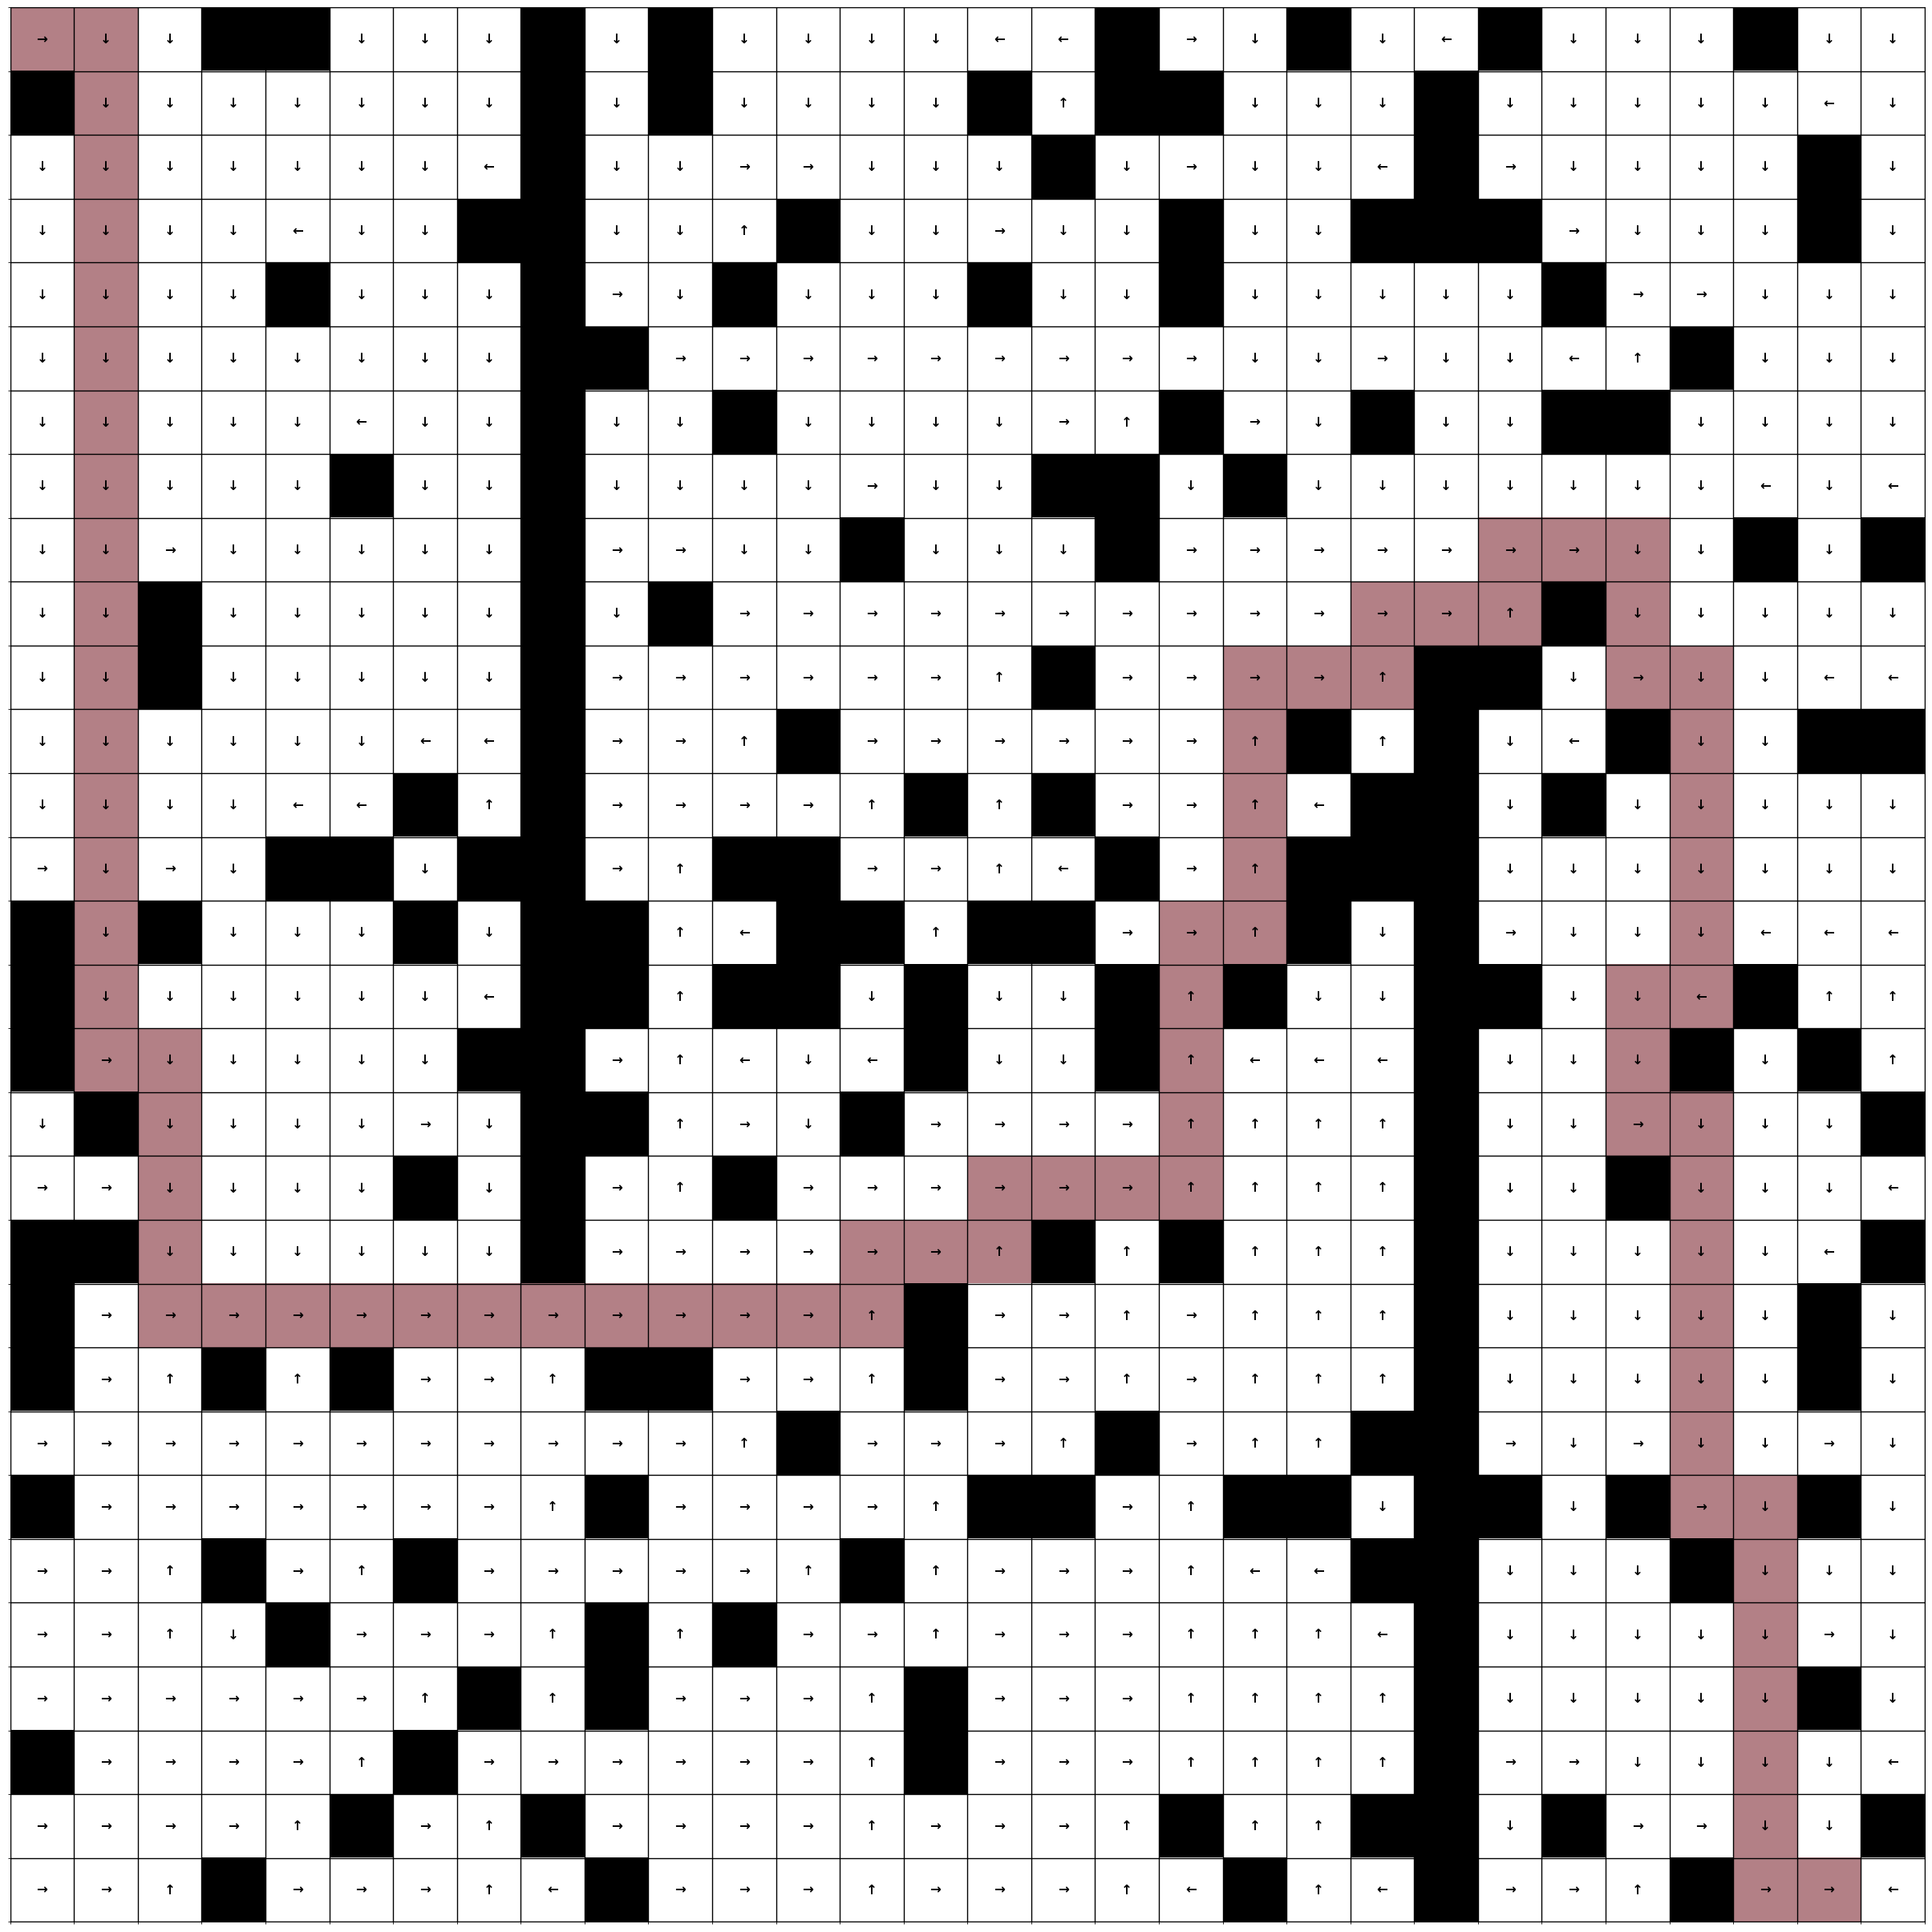

In [14]:
# v = np.random.random(maze.shape)
v = np.zeros_like(maze, dtype=float)
prev_v =  np.empty(maze.shape)
policy =  np.empty(maze.shape)
path =  np.empty(maze.shape)
iteration =  0
policy_change = 0
path_change = 0
while np.abs(prev_v-v).max()>1e-20:
    print('Iteration', iteration)
    print('Gap', np.abs(prev_v-v).max())
    for i in range(20):
        prev_v = v
        v = B_star(v)
        iteration += 1
    prev_policy = policy
    prev_path = path
    policy = greedy_policy(v)
    path = path_array(policy)
    if (policy != prev_policy).any():
        policy_change = iteration
        print('Policy change at ', iteration)
    if (path != prev_path).any():
        path_change = iteration
        print('Path change at ', iteration)
optimal_policy = policy
optimal_path = path
plot(optimal_policy, path=True)

On obtient une politique optimale au bout d'environ 80 itérations, ce qui correspond à environ 72000 mises à jour.

**Question 2**: Écrire une fonction `update_state` qui effectue une mise à jour d'itération état-valeur pour le contrôle seulement pour l'état donné en argument. La mise à jour sera faite sur une variable globale `v` qui sera définie plus tard.

In [15]:
def update_state(s):
    global v

    values = []
    for a in actions:
        r, s_ = transition(s, a)
        values.append(r + gamma*v[s_])
    v[s] = max(values)
    return None

**Question 3**: Effectuer une itération état-valeur asynchrone qui met à jour un état par itération, et qui parcourt les états de façon cyclique. Combien de mises à jour sont-elles nécessaires pour obtenir une politique optimale ? Essayer différents ordres de parcours des états.

In [16]:
def update_state_simple(s):
    global v, nb_updates
    values = []
    for a in actions:
        r, s_ = transition(s, a)
        values.append(r + gamma*v[s_])
    v[s] = max(values)
    nb_updates += 1
    return None

# v = np.random.random(maze.shape)
v = np.zeros_like(maze, dtype=float)

nb_updates = 0
policy = np.empty(maze.shape)
path = np.empty(maze.shape)
while (path != optimal_path).any():
# while (policy != optimal_policy).any():
    for line in range(height):
        for row in range(width):
            update_state_simple((line,row))
    policy = greedy_policy(v)
    path = path_array(policy)
print('Optimal policy after', nb_updates, 'updates')

Optimal policy after 63000 updates


In [17]:
nb_updates = 0
policy = np.empty(maze.shape)
path = np.empty(maze.shape)
# v = np.random.random(maze.shape)
v = np.zeros_like(maze, dtype=float)
while (policy != optimal_policy).any():
    for line in range(height):
        for row in range(width):
            update_state_simple((height-line-1,width-row-1))
    policy = greedy_policy(v)
    path = path_array(policy)
print('Optimal policy after', nb_updates, 'updates')

Optimal policy after 169200 updates


On souhaite à présent utiliser la structure du problème pour parcourir les états de façon plus efficace et diminuer le nombre de mises à jour permettant d'obtenir une politique optimale.

Pour un labyrinthe donné, il existe certains états $s$ pour lesquels on connaît immédiatement la valeur optimale $v_*(s)$.

**Question 4**: Écrire une fonction qui prend en argument une function état-valeur, et qui en renvoie une modifiée, où les valeurs optimales connues a priori ont été renseignées.

In [18]:
def set_known_values(v):
    v = 0 + (1-maze)*v
    v[target_cell] = 0
    return v

Un autre idée importante est que la valeur avec laquelle un état $s$ est mis à jour ne dépend que d'un petit nombre d'autres états, appelés "sucesseurs", c'est-à-dire ceux vers lesquels il existe une transition avec probabilité non-nulle. Autrement dit, les $s'$ tels qu'il existe une action $a$ telle que $p(r,s'|s,a)>0$. On dit alors également que $s$ est un prédecesseur de $s'$.

De plus, la valeur d'un état, après une première mise à jour, n'a besoin d'être à nouveau mise à jour que si la valeur d'un sucesseur a été modifiée.

**Question 5**: Écrire une fonction `predecessors` qui renvoie sous la forme d'une liste l'ensemble des prédecesseurs d'un état $s$ donné en argument. Ne pas oublier qu'un état peut être un prédecesseur pour lui-même.

In [19]:
def predecessors(s): # ne pas oublier qu'un état peut revenir sur lui-même
    list_of_predecessors = []
    line = s[0]
    row = s[1]

    if maze[s] == 1:
        return [s]
    else:
        if line > 0 and maze[line-1,row] == 0:
            list_of_predecessors.append((line-1,row))

        if line < maze.shape[0]-1 and maze[line+1,row] == 0:
            list_of_predecessors.append((line+1,row))

        if row > 0 and maze[line,row-1] == 0:
            list_of_predecessors.append((line,row-1))

        if row < maze.shape[1]-1 and maze[line,row+1] == 0:
            list_of_predecessors.append((line,row+1))

        if len(list_of_predecessors) < 4:
            list_of_predecessors.append(s)

        if target_cell in list_of_predecessors:
            list_of_predecessors.remove(target_cell)    
        return list_of_predecessors

On souhaite effectuer des mises à jour sucessives, divisées en phases (ou "époques"), mettant en oeuvre les idées suivantes:
- chaque état sera mis à jour au plus une fois pendant une époque;
- à chaque fois que la valeur d'un état est mis à jour (et que la mise à jour a entraîné une modification de la valeur), on considère chacun de ses prédecesseurs: s'il n'a pas encore été mis à jour lors de cette époque, il est ajouté à une liste d'états à mettre à jour lors de l'époque courante; s'il a déjà été mis à jour lors de cette époque, il est ajouté à une liste d'états à mettre à jour lors de l'époque suivante;
- les listes d'état à mettre à jour seront utilisées en FIFO (first in, first out): on ajoute un nouvel élement en fin de liste avec `.append()`, et on retire un élément en début de liste avec `.pop()`;
- on commence la première époque par les prédecesseurs de l'état "d'arrivée".

**Question 6**: Modifier la fonction `update_state` afin de mettre en oeuvre ces idées. La fonction interagira avec les variables globales `updated_states`, `states_to_update`, `states_to_update_next_epoch`, `epoch`.

In [20]:
def update_state(s):
    global v, nb_updates, updated_states, states_to_update, states_to_update_next_epoch, epoch

    previous_value = v[s]
    values = []
    for a in actions:
        r, s_ = transition(s, a)
        values.append(r + gamma*v[s_])
    v[s] = max(values)
    updated_states[s] = 1 
    nb_updates += 1
    if epoch == 0 or (v[s] != previous_value):
        for predecessor in predecessors(s):
            if updated_states[predecessor] == 0:
                states_to_update.append(predecessor)
            else:
                states_to_update_next_epoch.append(predecessor)
    return None

**Question 7**: Mettre en oeuvre la démarche décrite ci-dessus et observer le nombre de mises à jour nécessaires pour obtenir une politique optimale.

In [21]:
nb_epochs = 100
states_to_update_next_epoch = predecessors(target_cell)
nb_updates = 0
policy = np.empty(maze.shape)
path = np.empty(maze.shape)
v = np.zeros_like(maze, dtype=float)
# v = np.random.random(maze.shape)
v = set_known_values(v)
epoch =  -1
while (policy != optimal_policy).any():
    epoch += 1
    states_to_update = states_to_update_next_epoch
    states_to_update_next_epoch = []

    if states_to_update == []:
        print('No more updates to do')
    else:
        updated_states = np.zeros_like(maze)
        while len(states_to_update) > 0:
            s = states_to_update.pop(0)
            if updated_states[s] == 0:
                update_state(s) 
                policy = greedy_policy(v)
        print('End of epoch', epoch, ', Nb updates so far', nb_updates)
    policy = greedy_policy(v)
    path = path_array(policy)
if (policy == optimal_policy).all():
    print('optimal policy after', nb_updates)

End of epoch 0 , Nb updates so far 707
optimal policy after 707


**Question 8**: Mettre en oeuvre une variante où les mises à jour ne sont pas divisées en époques, et où les prédécesseurs à mettre à jour sont tous ajoutés à la même liste, et comparer le nombre de mises à jour nécessaires pour obtenir une politique optimale. Expliquer la différence.

In [22]:
def update_state_wo_epoch(s):
    global v, nb_updates, states_to_update

    previous_value = v[s]
    values = []
    for a in actions:
        r, s_ = transition(s, a)
        values.append(r + gamma*v[s_])
    v[s] = max(values)
    nb_updates += 1
    if v[s] != previous_value:
        for predecessor in predecessors(s):
            states_to_update.append(predecessor)
    return None

states_to_update = predecessors(target_cell)
nb_updates = 0
v = np.zeros_like(maze, dtype=float)
# v = np.random.random(maze.shape)
v = set_known_values(v)
while len(states_to_update) > 0:
    s = states_to_update.pop(0)
    update_state_wo_epoch(s) 
print('Nb updates', nb_updates)

Nb updates 2649


# Exercice 2 - Itérations asynchrones pour le plus grand nombre à 5 chiffres

On reprend le problème du plus grand nombre à 5 chiffres. On prendra toujours pour fonction valeur initiale un vecteur nul.

In [23]:
import random
import math
import numpy as np

def sigma(s,a):
    number = list(s[:5])
    number[a-1] = 0
    return number

S = [(i1,i2,i3,i4,i5,i6) for i1 in [1,0] for i2 in [1,0] for i3 in [1,0] for i4 in [1,0] for i5 in [1,0] for i6 in range(10)]

def B_star(v):
    v_ = v.copy()
    for s in S:
        values = [0]
        for a in [1,2,3,4,5]:
            if s[a-1] == 1:
                number = sigma(s,a)
                values.append(10**(a-1)*s[5] + sum([v[tuple(number+[i])] for i in range(10)])/10)
        v_[s] = max(values)
    return v_

**Question 1**: Combien de mises à jours sont nécessaires à une itération état-valeur synchrone pour atteindre une fonction valeur optimale ?

In [24]:
v = dict()
for s in S:
    v[s] = 0.
n=0
while True:
    v_ = B_star(v)
    if v_ == v:
        print('Fixed point obtained after', n*len(S), 'updates')
        break
    else:
        v = v_
        n += 1

Fixed point obtained after 1600 updates


**Question 2**: Implémenter une itération état-valeur asynchrone qui met à jour les valeurs des états de façon cyclique. Trouver un ordre de mise à jour d'états minimisant le nombre de mises à jour nécessaires pour atteindre une fonction valeur optimale.

In [25]:
v = dict()
for s in S:
    v[s] = 0.
n=0
nb_updates = 0
while True:
    for s in [(i1,i2,i3,i4,i5,i6) for i1 in [0,1] for i2 in [0,1] for i3 in [0,1] for i4 in [0,1] for i5 in [0,1] for i6 in range(10)]:
        values = [0]
        for a in [1,2,3,4,5]:
            if s[a-1] == 1:
                number = sigma(s,a)
                values.append(10**(a-1)*s[5] + sum([v[tuple(number+[i])] for i in range(10)])/10)
        v[s] = max(values)
        nb_updates += 1

        if B_star(v) == v:
            print('Fixed point obtained after', nb_updates, 'updates')
            break
    else:
        continue
    break

Fixed point obtained after 320 updates
